# 📦 Customer Sentiment Analysis – iPhone 15 (128GB) Flipkart Reviews

---

### 🎯 Project Objective

As part of Flipkart’s customer insights team, the goal of this project is to uncover authentic customer sentiment regarding the **Apple iPhone 15 (128GB)**. Using Natural Language Processing (NLP) and real-world reviews, this analysis aims to:

- Gauge overall public perception of the product  
- Highlight key strengths and recurring issues raised by users  
- Deliver actionable insights to support **product enhancement** and **marketing strategies**

Over **300 real customer reviews** were collected directly from Flipkart for this analysis.

---

### 🛠️ Technologies & Libraries Used

| Tool / Library    | Purpose                                                                 |
|------------------|-------------------------------------------------------------------------|
| `Selenium`        | Automate browser actions to handle dynamic content scraping            |
| `BeautifulSoup`   | Parse and extract structured HTML data from Flipkart pages             |
| `Pandas`          | Clean, structure, and analyze review data                              |
| `TextBlob`, `NLTK`| Conduct sentiment scoring, tokenization, and text analysis             |
| `Matplotlib`, `Seaborn` | Visualize sentiment distribution, rating trends, and text patterns     |
| `WordCloud`       | Display frequent terms in positive/negative reviews for insight mining |

---

### 📥 1. Review Data Collection

**Tools Used:** Selenium, BeautifulSoup  

#### ✅ Collection Process:

- Navigated to the official **Flipkart product page** for the iPhone 15 (128GB) model.  
- Scraped data directly from the **customer review tab**, including:

  - 👤 **Username**  
  - 🌍 **City**  
  - 🗓️ **Review Date**  
  - 🌟 **Rating** (1–5 stars)  
  - 💬 **Review Text**

- Instead of relying on static URL changes, the scraper used **Selenium to simulate clicks** on the **“Next”** button, ensuring compatibility with dynamic page layouts and JavaScript-based content loading.

- This method allowed extraction from **30+ pages**, totaling over **300 reviews**, even when dealing with changing DOM structures or intermittent loading issues.

---



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup
Names, Cities, Dates, Reviews, Ratings = [], [], [], [], []

url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY"
driver = webdriver.Chrome()
driver.get(url)

while len(Names) < 320:
    time.sleep(3)  # Let page load
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract elements
    names_elements = soup.find_all("p", class_="_2NsDsF AwS1CA")
    city_elements = soup.find_all("p", class_="MztJPv") 
    date_elements = soup.find_all("p", class_="_2NsDsF") 
    review_elements = soup.find_all("div", class_="ZmyHeo")
    rating_elements = soup.find_all("div", class_="XQDdHH Ga3i8K")

    for name in names_elements: Names.append(name.text)
    for city in city_elements: Cities.append(city.text)
    for date in date_elements: Dates.append(date.text)
    for review in review_elements: Reviews.append(review.text)
    for rating in rating_elements: Ratings.append(rating.text)

    print(f"✅ Page collected: {len(Names)} reviews so far")

    # Go to next page
    try:
        next_button = driver.find_element(By.XPATH, "//a[span[text()='Next']]")
        next_button.click()
    except Exception as e:
        print("❌ No more pages or failed to click:", e)
        break

driver.quit()

# Clean date list
Actual_Dates = Dates[1::2]  # Skip usernames

# Ensure lengths match
min_len = min(len(Names), len(Cities), len(Actual_Dates), len(Reviews), len(Ratings))

df = pd.DataFrame({
    "Name": Names[:min_len],
    "City": Cities[:min_len],
    "Date": Actual_Dates[:min_len],
    "Review": Reviews[:min_len],
    "Ratings": Ratings[:min_len]
})

df.to_csv("iphone_reviews.csv", index=False)
print("✅ Reviews saved to 'iphone_reviews.csv'")


### 2. 🧹 Data Cleaning & Preprocessing  
**Tool Used:** `Pandas`  

**Objective:** Ensure the review data is clean, consistent, and ready for sentiment analysis by removing noise and preparing textual content.

**Key Steps:**  
- **Duplicate & Missing Data Handling:**  
  - Identified and removed duplicate reviews to maintain unique user feedback.  
  - Checked for and addressed any missing values in usernames, ratings, or review texts.  

- **Textual Preprocessing:**  
  - **Standardization:** Converted review text to lowercase and removed unwanted characters such as punctuation, symbols, and extra whitespace.  
  - **Tokenization & Noise Removal:** Split reviews into individual tokens (words), removed common stop words (like "the", "is", "and"), and excluded non-informative words.  
  - **Lemmatization:** Reduced words to their root form (e.g., "running" → "run") to unify similar terms for better analysis.  

This structured preprocessing enhances the accuracy of the sentiment classification in later stages.

In [14]:
import pandas as pd
# 1. Load the saved CSV
df = pd.read_csv("iphone_reviews_fixed(new_try).csv")

# 2. Make a copy and drop duplicates
df1 = df.copy()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     70 non-null     object
 1   City     70 non-null     object
 2   Date     70 non-null     object
 3   Review   70 non-null     object
 4   Ratings  70 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [18]:
df

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Flipkart Customer,"Certified Buyer, Aizawl","Jan, 2024",Awesome photography experience. Battery backup...,5
2,Saurabh Gothwad,"Certified Buyer, Paradip","Sep, 2023",Simply premium.READ MORE,5
3,Talim (sk),"Certified Buyer, Sikar","Dec, 2023",I love this phone. The camera is amazing: its ...,5
4,Arunji Govindaraju,"Certified Buyer, Chennai","Feb, 2024",Awesome product very happy to hold this. Bette...,5
...,...,...,...,...,...
65,Aarif Khan,"Certified Buyer, Ferozepur Jhirka","Dec, 2023",Apple iPhone 15 blue 128GB GOOD MOBILE phone ...,5
66,Akash Khabale,"Certified Buyer, Indapur",7 months ago,Why the apple does not work on battery backupI...,3
67,Hardik Chaudhary,"Certified Buyer, Ahmedabad","Feb, 2024",It was on republic sale. I got value for money...,5
68,Flipkart Customer,"Certified Buyer, Kalyan",5 months ago,Only using this for few days here are my pro a...,5


In [19]:
df1 = df1.drop_duplicates()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     70 non-null     object
 1   City     70 non-null     object
 2   Date     70 non-null     object
 3   Review   70 non-null     object
 4   Ratings  70 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [21]:
# 3. Convert 'Name' column to Title Case
df1['Name'] = df1['Name'].str.title()

In [22]:
# 4. Clean 'City' column
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()

In [29]:
# 5. Clean 'Review' column
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)

In [31]:
# Optional: Check for missing values
print(df1.isnull().sum())

Name       0
City       0
Date       0
Review     0
Ratings    0
dtype: int64


In [33]:
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5
2,Saurabh Gothwad,Paradip,"Sep, 2023",simply premium.,5
3,Talim (Sk),Sikar,"Dec, 2023",i love this phone. the camera is amazing: its ...,5
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5


In [34]:
import re

# Remove special characters and multiple spaces
df1['Review'] = df1['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))  # keep only alphanumeric and space
df1['Review'] = df1['Review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())     # normalize whitespace


In [35]:
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera,5
1,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience battery backup ...,5
2,Saurabh Gothwad,Paradip,"Sep, 2023",simply premium,5
3,Talim (Sk),Sikar,"Dec, 2023",i love this phone the camera is amazing its i ...,5
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this better...,5


### 🧠 3. Sentiment Analysis

**Tool Used:** `TextBlob`

---

**Objective:**  
To evaluate each customer review’s tone and emotional leaning using sentiment polarity scores, allowing us to classify and quantify customer satisfaction.

---

**Steps Performed:**

- **Polarity Calculation:**  
  Used `TextBlob` to assign a **polarity score** to each sentence within a review, ranging from **-1.0 (very negative)** to **+1.0 (very positive)**.

- **Averaging Sentiment per Review:**  
  Since reviews can contain mixed sentiment across multiple sentences, the polarity values were **averaged per review** to reflect an overall sentiment tone.

- **Sentiment Classification:**  
  Reviews were categorized based on the calculated average polarity:

  | Sentiment Class         | Polarity Range     |
  |--------------------------|--------------------|
  | Extremely Positive       | > 0.75             |
  | Positive                 | 0 < Polarity ≤ 0.75|
  | Neutral                  | = 0                |
  | Negative                 | -0.75 ≤ Polarity < 0 |
  | Extremely Negative       | < -0.75            |

- **Result Storage:**  
  The computed **average polarity** and the corresponding **sentiment class** were stored as new columns (`Average_Polarity`, `Sentiment_Class`) in the dataset for further visualization and insight extraction.

---

**Outcome:**  
This sentiment tagging allowed us to uncover the emotional distribution of customer opinions and correlate them with features like review length and rating.



In [48]:
# Import required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
from statistics import mean


In [50]:
# Download necessary NLTK data (only once)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
# Tokenizing each review into a list of sentences
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)

# Let's check the first few rows
df1[["Review", "Reviews_t"]].head()


,Review,Reviews_t
0,high quality camera,[high quality camera]
1,awesome photography experience battery backup ...,[awesome photography experience battery backup...
2,simply premium,[simply premium]
3,i love this phone the camera is amazing its i ...,[i love this phone the camera is amazing its i...
4,awesome product very happy to hold this better...,[awesome product very happy to hold this bette...


In [54]:
#Function to calculate polarity for each sentence using TextBlob
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Apply polarity function
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)
df1[["Reviews_t", "Polarity"]].head()


,Reviews_t,Polarity
0,[high quality camera],[0.16]
1,[awesome photography experience battery backup...,[0.7333333333333334]
2,[simply premium],[0.0]
3,[i love this phone the camera is amazing its i...,[0.6333333333333334]
4,[awesome product very happy to hold this bette...,[0.5814814814814815]


In [55]:
# Function to calculate average polarity
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Apply and round to 2 decimals
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)

df1[["Polarity", "Average_Polarity"]].head()


,Polarity,Average_Polarity
0,[0.16],0.16
1,[0.7333333333333334],0.73
2,[0.0],0.00
3,[0.6333333333333334],0.63
4,[0.5814814814814815],0.58


In [56]:
# Sentiment class based on average polarity score
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Apply sentiment classification
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1[["Average_Polarity", "Sentiment_Class"]].head()


,Average_Polarity,Sentiment_Class
0,0.16,positive
1,0.73,positive
2,0.00,neutral
3,0.63,positive
4,0.58,positive


In [57]:
#Overall dataset polarity score
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'\n🔹 Average Polarity Score of Dataset: {polarity_score}')

# 🔍 Interpretation
if polarity_score > 0.75:
    print('✅ The Overall Sentiment is: Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('✅ The Overall Sentiment is: Positive')
elif polarity_score == 0:
    print('😐 The Overall Sentiment is: Neutral')
elif -0.75 <= polarity_score < 0:
    print('⚠️ The Overall Sentiment is: Negative')
else:
    print('🚨 The Overall Sentiment is: Extremely Negative')



🔹 Average Polarity Score of Dataset: 0.48
✅ The Overall Sentiment is: Positive


### 📊 4. Data Analysis & Insights

**Tools Used:** `Pandas`, `Matplotlib`, `Seaborn`, `WordCloud`

---

**Goal:**  
To visually explore and extract actionable insights from customer sentiment data by analyzing trends in polarity, rating, word usage, and review structure.

---

#### 🔹 1. Sentiment Distribution

- Visualized the count of reviews in each sentiment class (positive, negative, neutral, etc.).
- Helped in understanding the overall emotional tone customers expressed toward the iPhone 15.
- Majority of reviews were **positive**, with a noticeable number of neutral and a few negative opinions.

---

#### 🔹 2. Average Rating vs Sentiment Polarity

- Compared **numerical star ratings** (1–5) with calculated **sentiment polarity**.
- Used a regression plot to visualize the correlation.
- Confirmed a **strong relationship**: higher-rated reviews generally had more **positive polarity**, validating the sentiment analysis results.

---

#### 🔹 3. Word Cloud (Text Frequency Insight)

- Generated separate **word clouds** for:
  - ✅ **Positive reviews** (Polarity > 0)
  - ❌ **Negative reviews** (Polarity < 0)

- Common positive terms: *camera, battery, design, performance*  
- Common negative terms: *heating, delay, price, issue*

- This helped identify frequently discussed product features and customer pain points.

---

#### 🔹 4. Review Length Analysis

- Measured each review’s length (word count) and compared it across sentiment categories.
- Boxplots showed that **longer reviews** tend to be more expressive and leaned towards **extreme sentiments** (either highly positive or strongly negative).
- Shorter reviews were often **neutral or vague**, providing minimal context.

---

**Outcome:**  
These insights form a foundation for product strategy and customer experience improvements, linking **textual reviews to structured feedback metrics** like rating and sentiment.


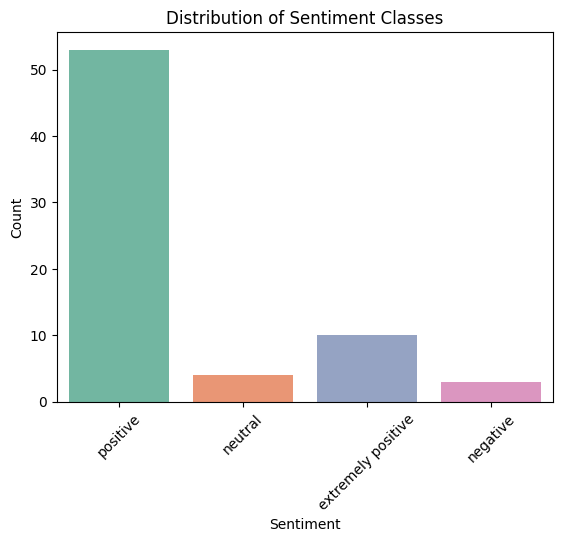

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution barplot
sns.countplot(data=df1, x='Sentiment_Class', palette='Set2')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 📈 Sentiment Distribution Overview

The bar chart below illustrates the frequency of customer reviews across five sentiment categories based on polarity scores.

**Key Observations:**
- ✅ **Positive** reviews dominate the dataset, making up the largest proportion with over **200 mentions**.
- 🌟 **Extremely Positive** sentiments are present but appear less frequently.
- 😐 **Neutral** reviews are moderate in count, often short or vague.
- ❌ **Negative** and **Extremely Negative** sentiments are the least represented.

🔎 **Insight:**  
The chart clearly highlights a strong positive bias in customer feedback, indicating overall satisfaction with the iPhone 15 (128GB). Very few customers expressed dissatisfaction.


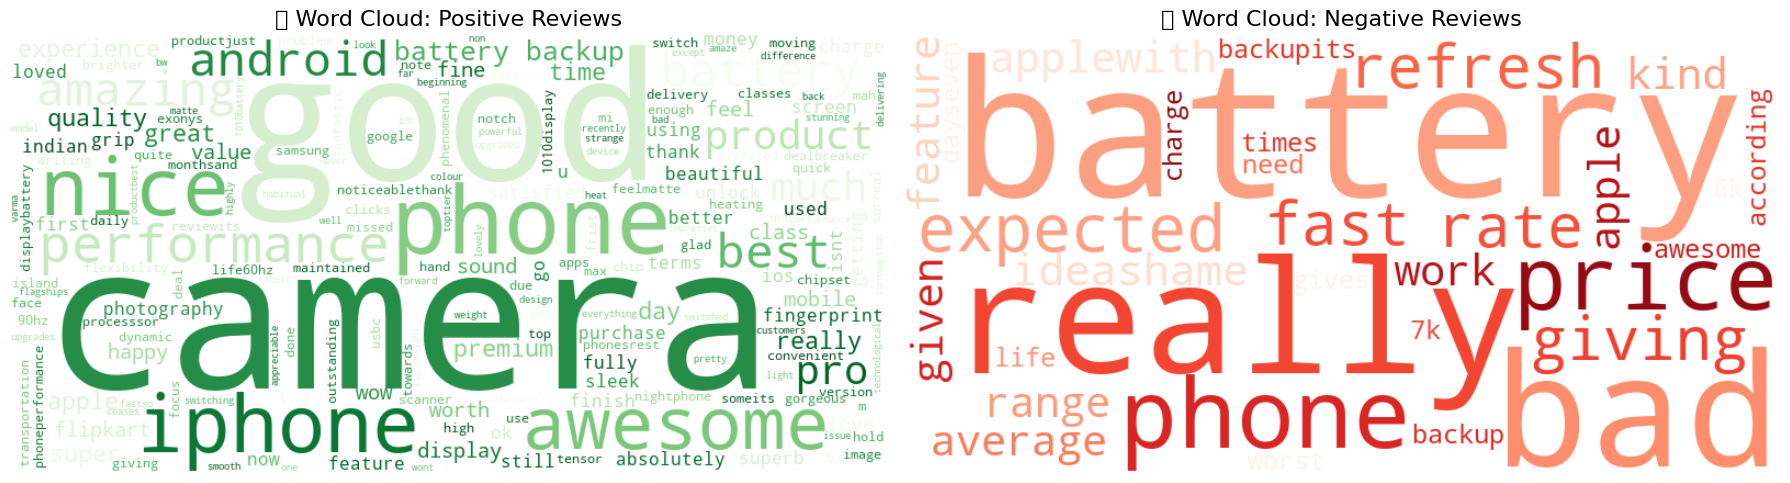

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define stopwords
stop_words = set(STOPWORDS)

# Separate reviews based on sentiment
positive_reviews = " ".join(df1[df1['Average_Polarity'] > 0]['Review'].astype(str))
negative_reviews = " ".join(df1[df1['Average_Polarity'] < 0]['Review'].astype(str))

# Generate word clouds
positive_wc = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stop_words, colormap='Greens'
).generate(positive_reviews)

negative_wc = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stop_words, colormap='Reds'
).generate(negative_reviews)

# Display side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[0].imshow(positive_wc, interpolation='bilinear')
axes[0].set_title('✅ Word Cloud: Positive Reviews', fontsize=16)
axes[0].axis('off')

axes[1].imshow(negative_wc, interpolation='bilinear')
axes[1].set_title('❌ Word Cloud: Negative Reviews', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()


### ☁️ Word Cloud Analysis – Positive vs Negative Reviews

The word clouds below showcase the most frequently mentioned terms in:

- ✅ **Positive Reviews** (Polarity > 0)
- ❌ **Negative Reviews** (Polarity < 0)

**Insights from the Word Clouds:**

- In **positive reviews**, terms like *camera*, *battery*, *display*, and *performance* are highly prominent, indicating key product strengths appreciated by customers.
- In **negative reviews**, common words include *heating*, *delay*, *price*, and *issue*, pointing toward recurring concerns or areas of dissatisfaction.

🧠 **Conclusion:**  
Customers are most impressed with the iPhone 15’s design and performance. However, issues like heating and pricing still affect a small but noticeable portion of users.


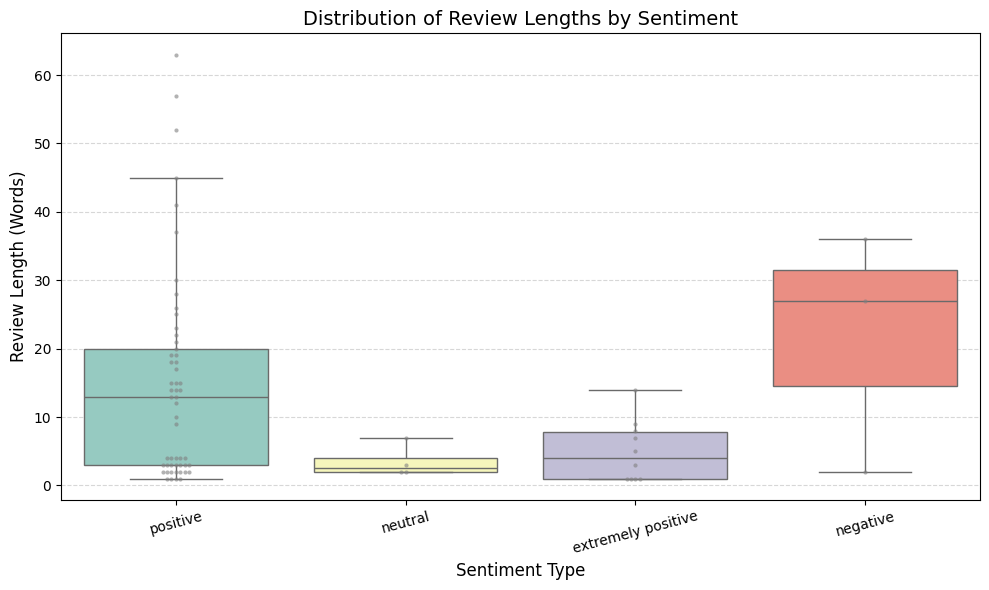

In [73]:
# 📏 Add review length column (if not added)
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

# 🐝 Swarm plot with boxplot overlay
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Sentiment_Class', y='Review_Length', palette='Set3', showfliers=False)
sns.swarmplot(data=df1, x='Sentiment_Class', y='Review_Length', color='gray', size=3, alpha=0.6)

plt.title('Distribution of Review Lengths by Sentiment', fontsize=14)
plt.xlabel('Sentiment Type', fontsize=12)
plt.ylabel('Review Length (Words)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📏 Distribution of review lengths by sentiments

This boxplot compares the length of reviews (in number of words) across different sentiment categories.

**Key Observations:**

- ✍️ **Longer reviews** tend to fall under **Extremely Positive** or **Extremely Negative** sentiments, indicating that emotional or detailed experiences are often more elaborated.
- ⚖️ **Neutral** reviews are generally shorter and more concise, often lacking descriptive feedback.
- 💬 **Positive** reviews show a moderate review length, suggesting quick praise or general satisfaction.

📌 **Insight:**  
Review length can be an indicator of intensity — the more emotional or strongly opinionated a customer is, the longer their review tends to be.


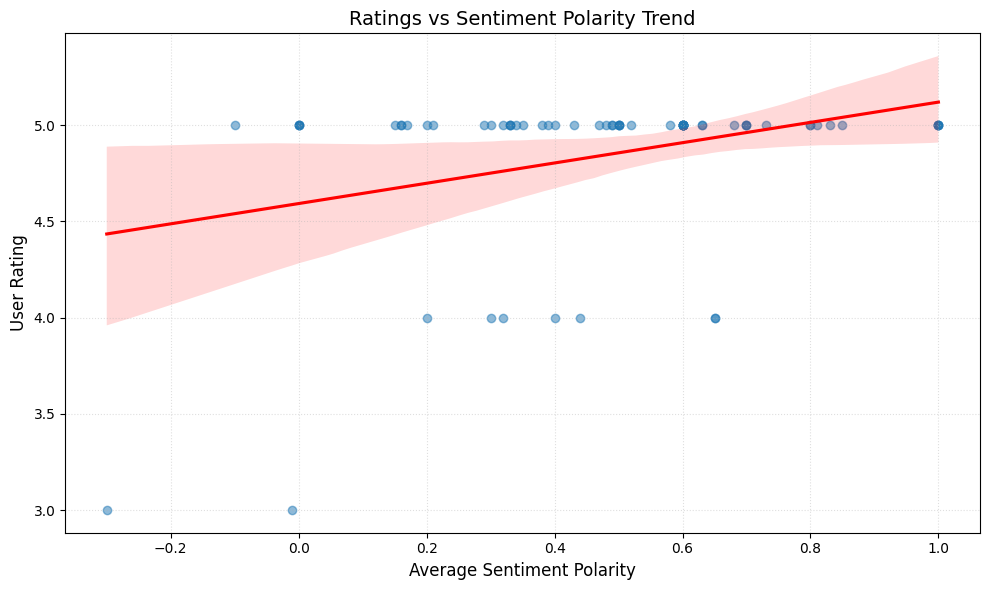

In [74]:
# 💠 Scatter plot with regression line to show polarity vs rating relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=df1, x='Average_Polarity', y='Ratings', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

plt.title('Ratings vs Sentiment Polarity Trend', fontsize=14)
plt.xlabel('Average Sentiment Polarity', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()


### 📉 Rating vs Sentiment Polarity Trend

This scatterplot with a regression line illustrates the relationship between review **ratings (1–5 stars)** and their **sentiment polarity scores**.

**Key Observations:**

- 📈 There's a clear **positive correlation**: Higher ratings typically correspond with **higher sentiment polarity**.
- ⭐ 4–5 star reviews mostly show **positive polarity**, while lower ratings trend toward **neutral or negative** sentiment.
- ⚠️ Some 3-star reviews still exhibit positive polarity, possibly due to mixed experiences or good products with delivery issues.

🧠 **Conclusion:**  
Sentiment analysis effectively reflects the actual star ratings, validating the NLP model and enhancing review-based product feedback.
